In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
%matplotlib inline
import pandas as pd
import pandas_datareader as pdr

Finance Data Project
In this data project I focused on exploratory data analysis of stock prices. Showing visual skills using matplotlib and pandas. As well as an in depth understanding of the data. (NOT FINANCIAL ADVICE)

In [79]:
#gets the data from these time periods
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [88]:
#fetches all the data from the banks
BAC = yf.download("BAC", start=start, end=end)

C = yf.download("C", start=start, end=end)

GS = yf.download("GS", start=start, end=end)

JPM = yf.download("JPM", start=start, end=end)

MS = yf.download("MS", start=start, end=end)

WFC = yf.download("WFC", start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [90]:
#allows you get returns and plot data
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [92]:
#adding all the data into one data frame
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [94]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [25]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2020-01-02   35.349998  35.660000  35.290001  35.639999  31.854317  37614200   
2020-01-03   34.980000  35.150002  34.759998  34.900002  31.192921  50357900   
2020-01-06   34.410000  34.900002  34.369999  34.849998  31.148235  42185000   
2020-01-07   34.700001  34.919998  34.529999  34.619999  30.942661  34149000   
2020-01-08   34.570000  35.189999  34.549999  34.970001  31.255486  45311600   

Bank Ticker          C                                   ...         MS  \
Stock Info        Open       High        Low      Close  ...        Low   
Date                                                     ...              
2020-01-02   80.129997  81.260002  80.029999  81.230003  ...  51.169998   
2020-01-03   79.800003  80.519997  79.449997  79.699997  ...  50.830002   
2020-01-06   78.720001  79.550003  78.720001  79.449997  ...  50.459999   
2020-01-07   79.290001  79.300003  78.730003  78.760002  ...  50.709999   
2020-01-08   78.769997  80.000000  78.680000  79.360001  ...  50.900002   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2020-01-02   52.040001  45.027164  7808000  53.849998  54.040001  53.509998   
2020-01-03   51.200001  44.300362  6706000  53.110001  53.619999  52.900002   
2020-01-06   51.020000  44.144615  7476700  52.740002  53.200001  52.720001   
2020-01-07   50.919998  44.058098  4538100  53.049999  53.049999  52.470001   
2020-01-08   51.570000  44.620495  6185200  52.840000  53.330002  52.799999   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2020-01-02   53.750000  47.685776  16803100  
2020-01-03   53.419998  47.393005  15608800  
2020-01-06   53.099998  47.109116  13200300  
2020-01-07   52.660000  46.718746  13278600  
2020-01-08   52.820000  46.860706  16585600  

[5 rows x 36 columns]

In [96]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [98]:
returns = pd.DataFrame()

In [100]:
#creating the frame
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


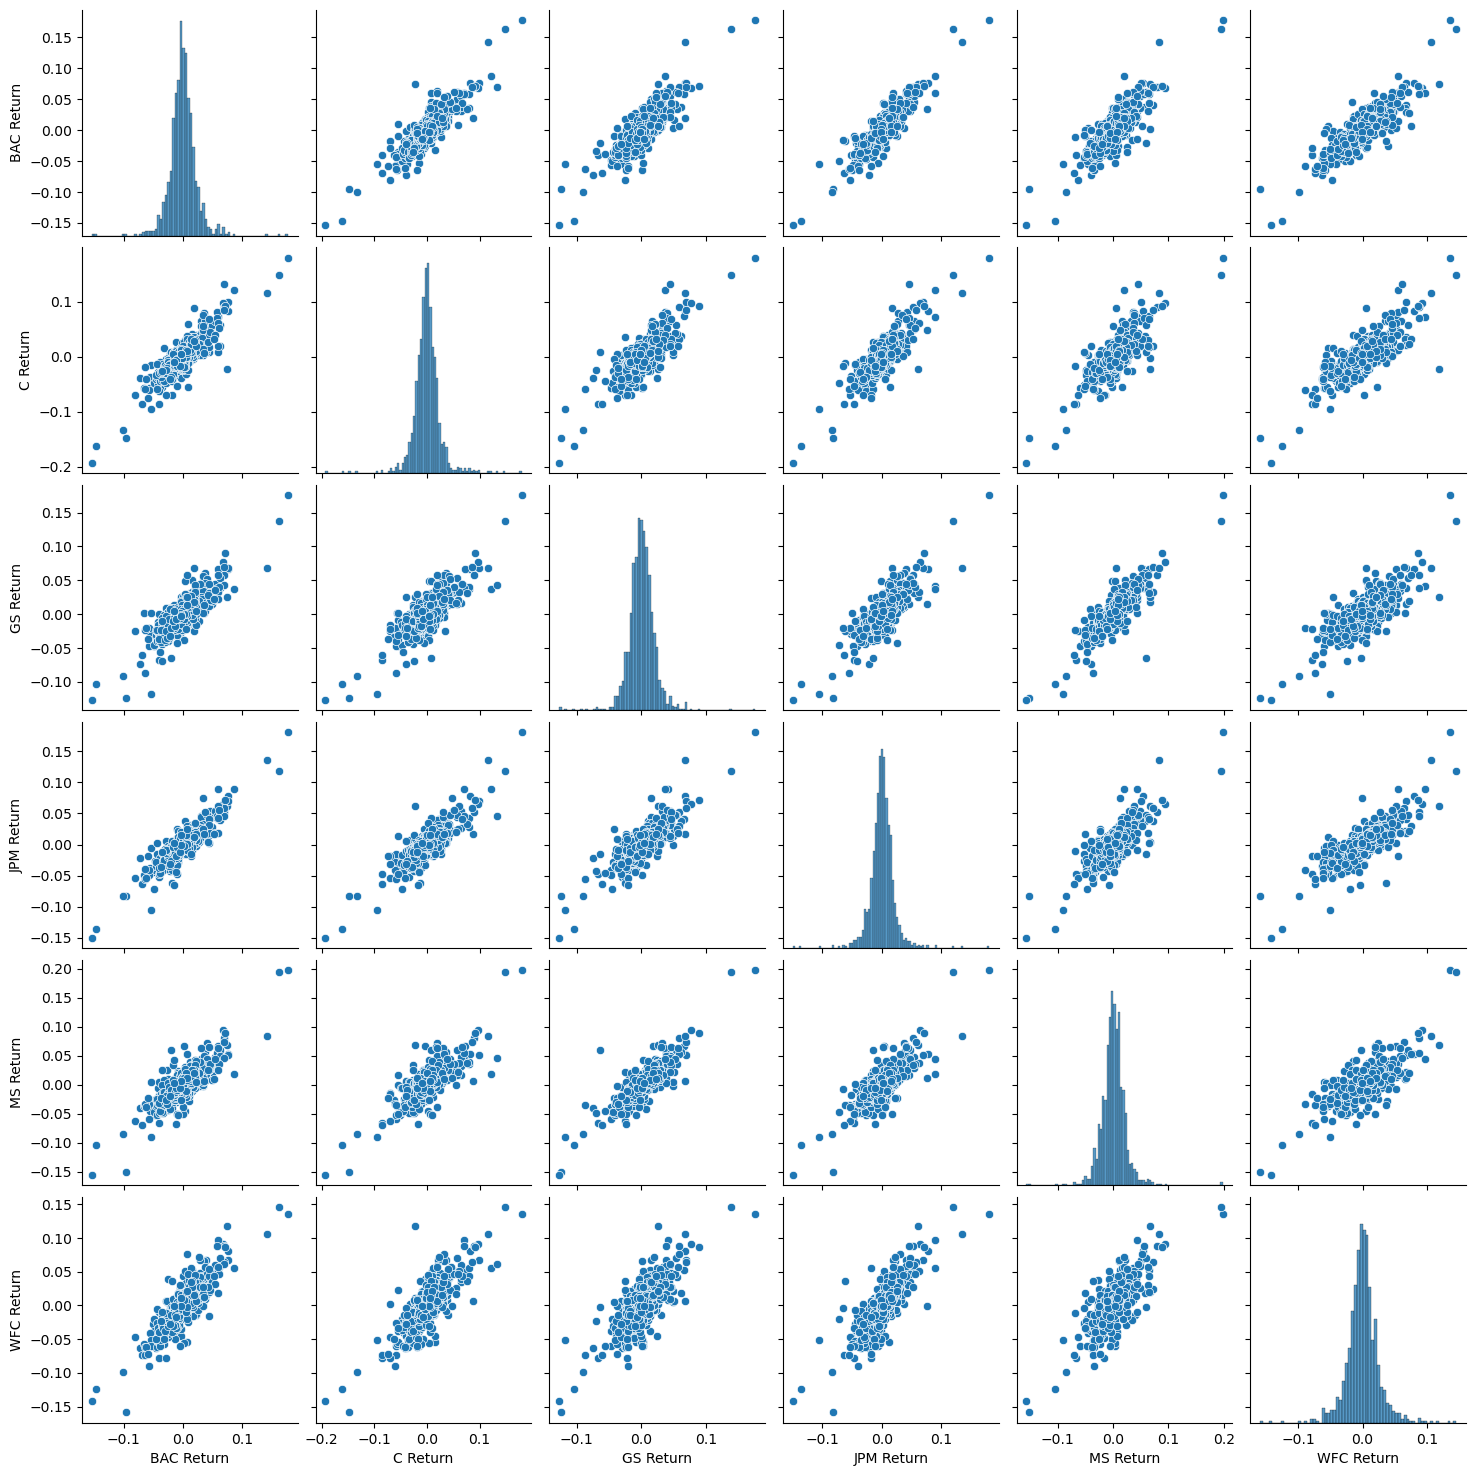

In [33]:
#returns index [1]
import seaborn as sns
sns.pairplot(returns[1:])

In [102]:
#worst drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [104]:
#best single day gain
#citigroup stock split in May 2011
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [106]:
#citigroup riskiest
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [108]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/var/folders/hh/hw7jjd2s4_q56g5gpn6znnj00000gn/T/ipykernel_8747/1960598734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


<Axes: xlabel='MS Return', ylabel='Density'>

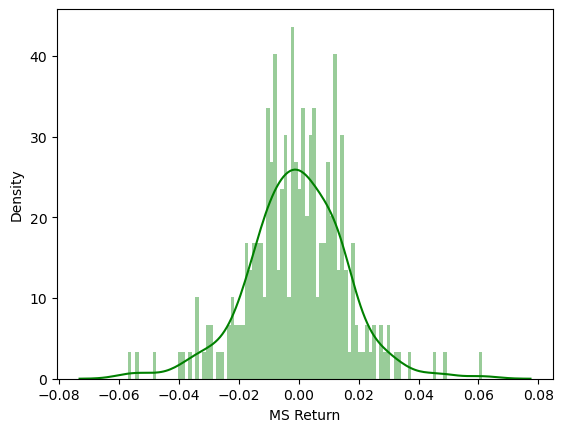

In [112]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

/var/folders/hh/hw7jjd2s4_q56g5gpn6znnj00000gn/T/ipykernel_8747/1612079653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


<Axes: xlabel='C Return', ylabel='Density'>

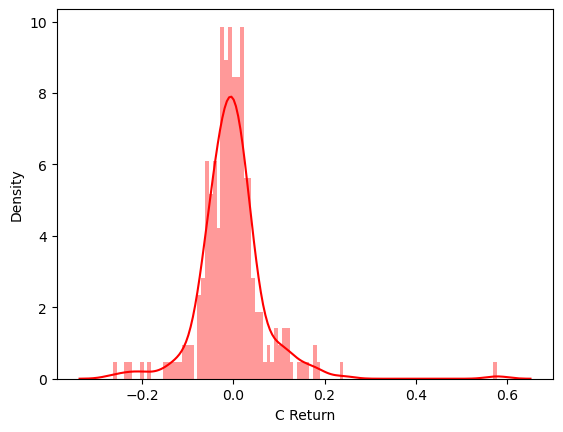

In [114]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

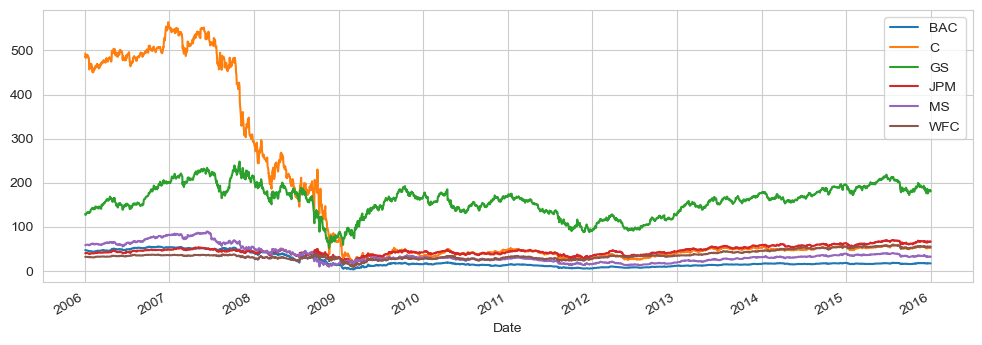

In [118]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [ ]:
#bank of america (BAC): If BAC shows a steady upward trend, it might indicate strong performance or growth prospects.
#citigroup (C): If CitiGroup shows volatility, it might be more sensitive to market changes.
#godlman sachs (GS): If GS has a relatively smooth trend, it could indicate stability.
#jpmorgan chase (JPM): JPM might show consistent performance, suggesting resilience.
#morgan stanley (MS): MS might display fluctuating performance, indicating market sensitivity.
#wells fargo (WFC): WFC’s trend might be relatively flat or show specific seasonal patterns.

<Axes: xlabel='Date'>

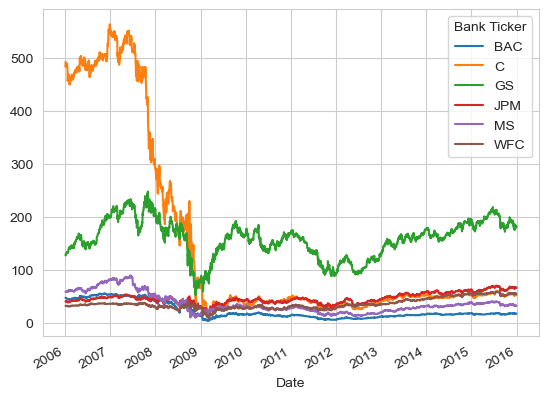

In [120]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [ ]:
#synchronization: Stocks that move in similar patterns might be influenced by similar market factors. For instance, if several bank stocks move together, it could be due to sector-wide trends or economic conditions affecting the banking industry.

#outliers: Identify any stock that significantly deviates from the others. This could indicate unique factors affecting that stock, such as company-specific events or news.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



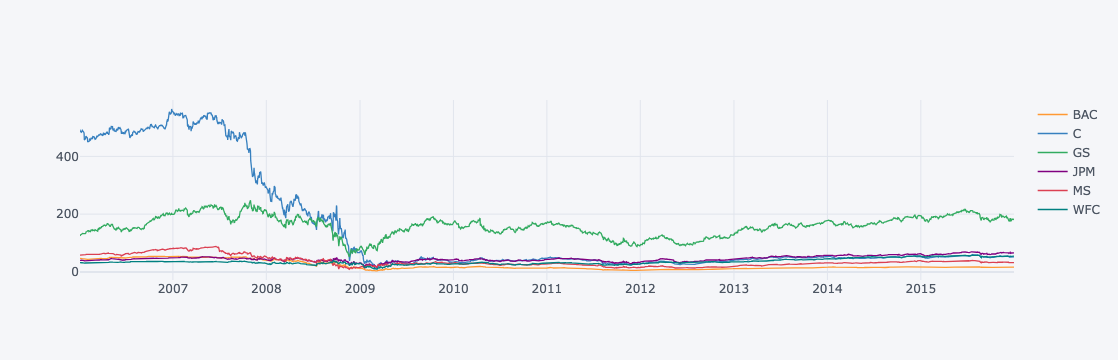

In [122]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

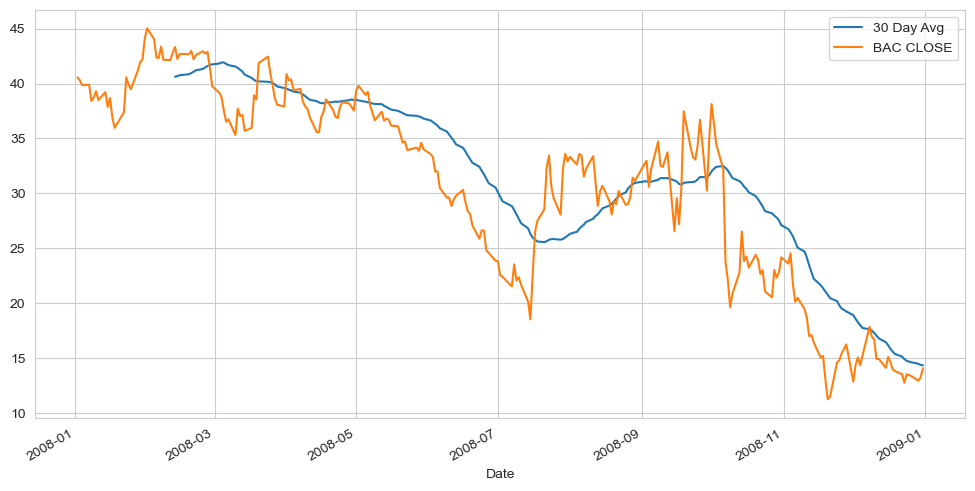

In [126]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

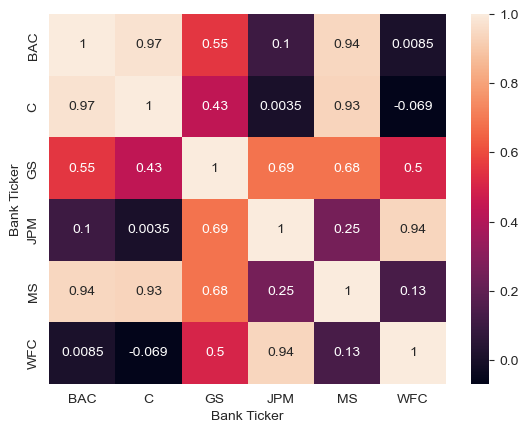

In [128]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [ ]:
#strong Correlations: You might observe that some bank stocks, like BAC and JPM, have high positive correlations. This indicates that they tend to perform similarly under similar market conditions.

#diverse Relationships: Other pairs, such as GS and WFC, might show lower correlations, suggesting their price movements are less synchronized.

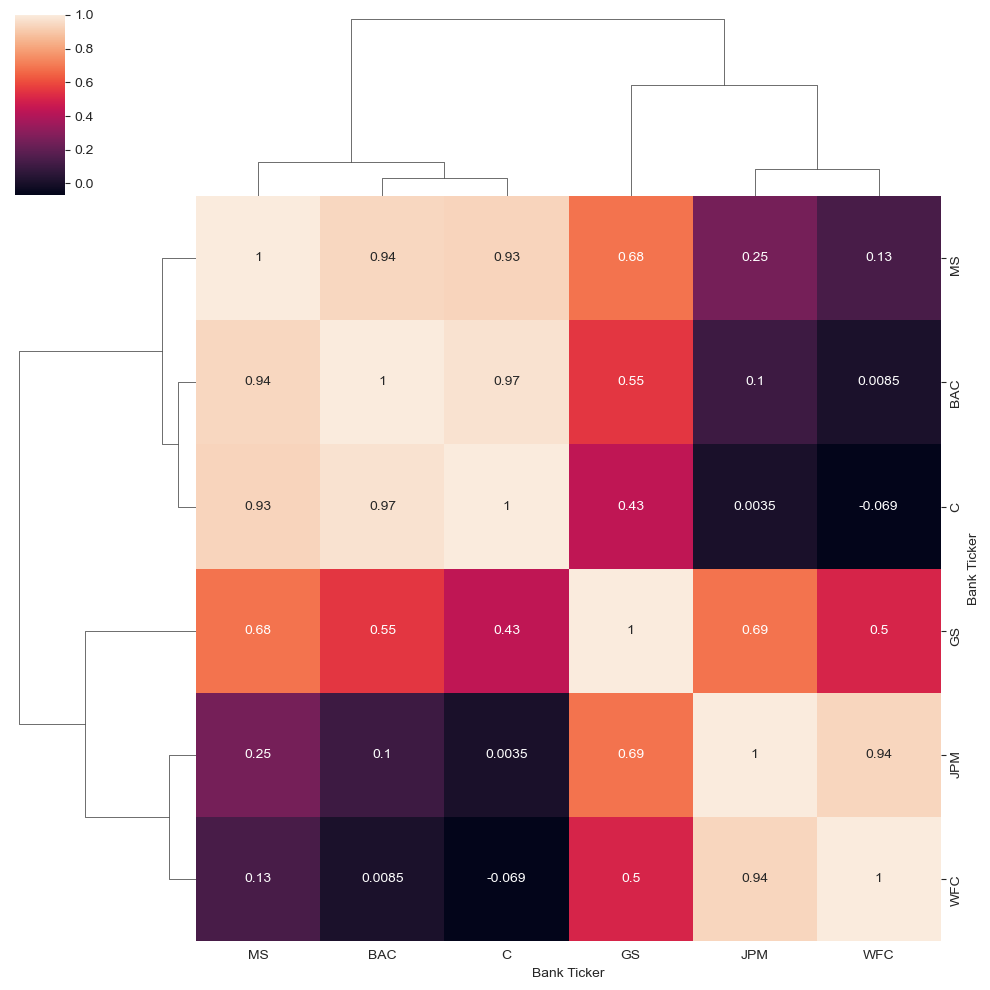

In [130]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

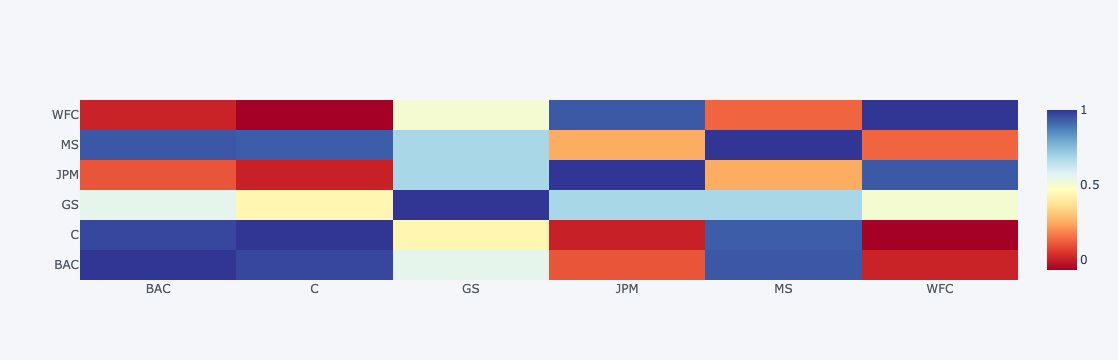

In [132]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

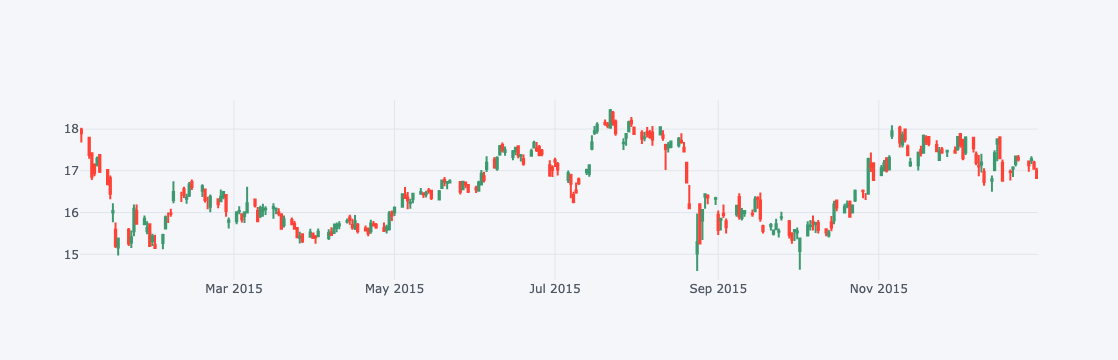

In [136]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [ ]:
#provides detailed insights into daily price movements, trends, and volatility.
#helps in identifying potential trends and reversal patterns.
#siing plotly for interactive charts allows for dynamic exploration of price data.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



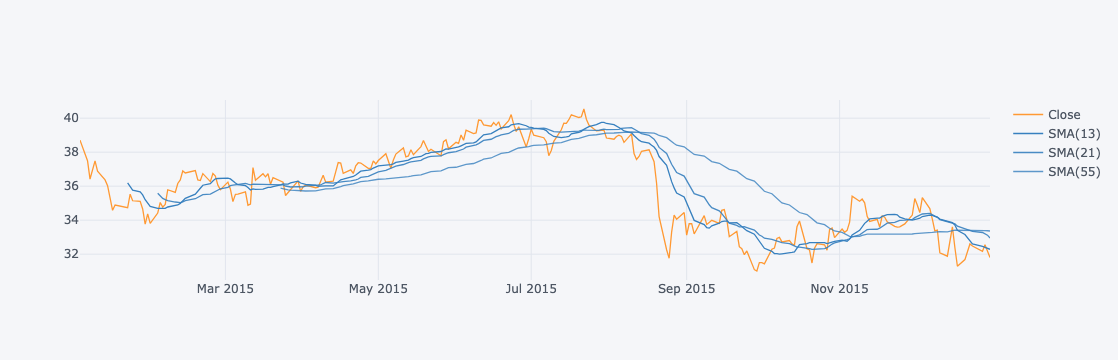

In [140]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [ ]:
#price often finds support or resistance at moving average lines. 
#if the price consistently bounces off a moving average, that average may be acting as support or resistance.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



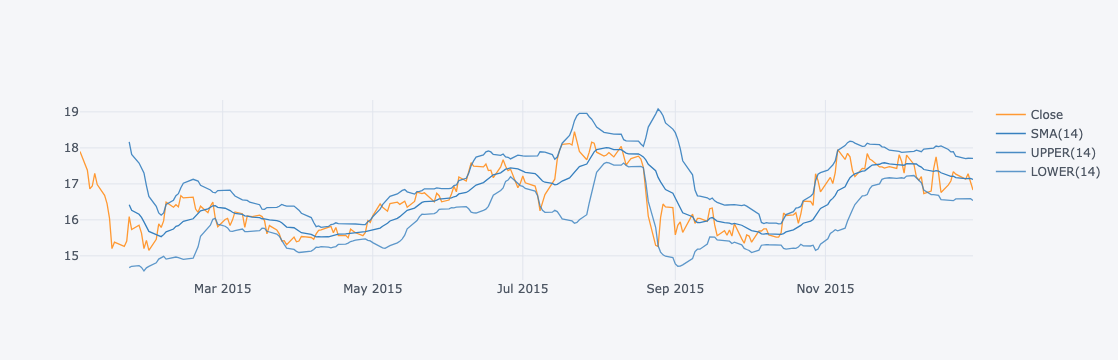

In [144]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [ ]:
#prices breaking out of the bands might indicate strong momentum or a significant change in volatility. 
#for example, a price breakout above the upper band can signal strong bullish momentum, while a breakout below the lower band can signal strong bearish momentum.